In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os

def intg(d):
    return (d[510:525] - d[:500].mean()).sum()

def histdata(loop, farray, numbins):
    hist, edges = np.histogram(farray, bins=1000, range=(0,1000))
    return hist, edges

total_hist = np.zeros(1000)
#print(total_hist)
path = r'C:\Users\kyoto\WaveDump'
direction = 'down'   #edit here!!!!!!
date = '01241002'   #edit here!!!!!!
data_path = os.path.join(path, direction + date, date + direction)
print(data_path)

num_of_loops = 27   #edit here!!!!!!

C:\Users\kyoto\WaveDump\down01241002\01241002down


C:\Users\kyoto\WaveDump\down01241002\01241002down0.txt
67136.0
C:\Users\kyoto\WaveDump\down01241002\01241002down1.txt
66453.0
C:\Users\kyoto\WaveDump\down01241002\01241002down2.txt
65544.0


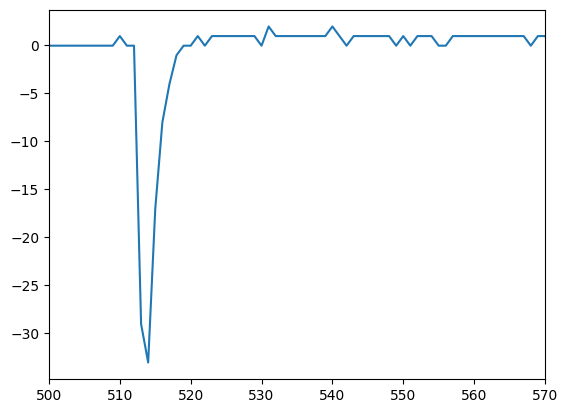

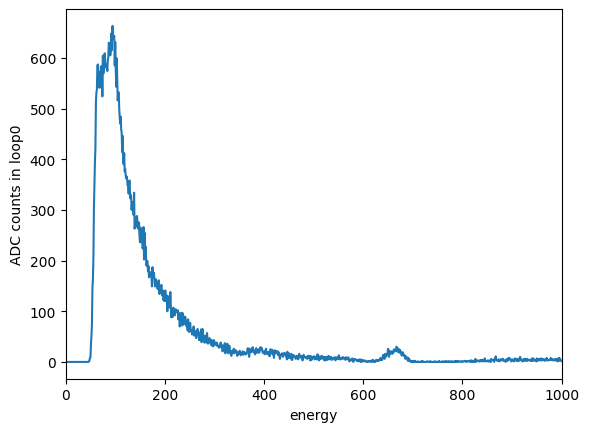

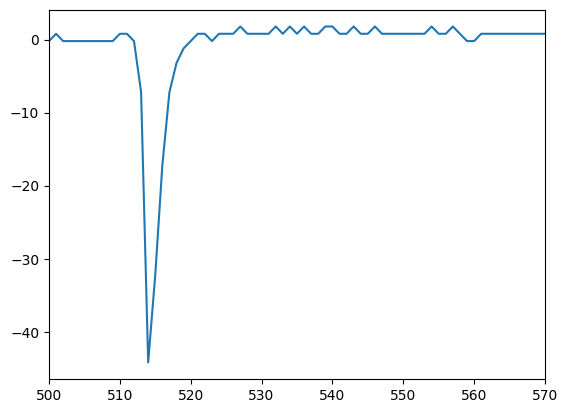

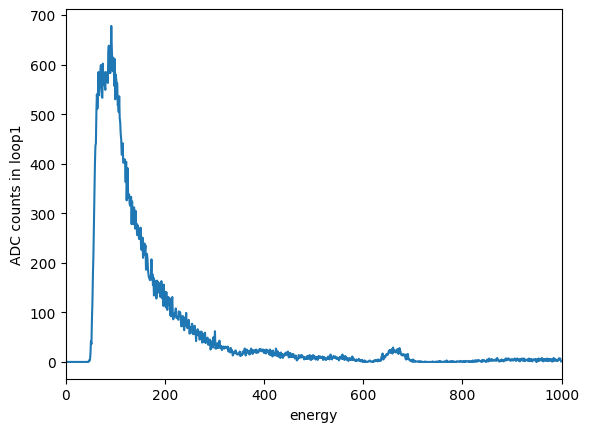

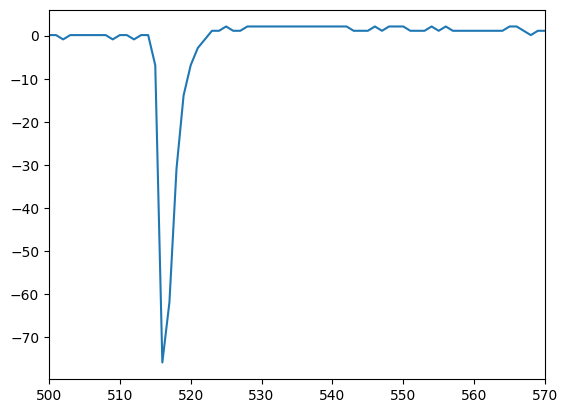

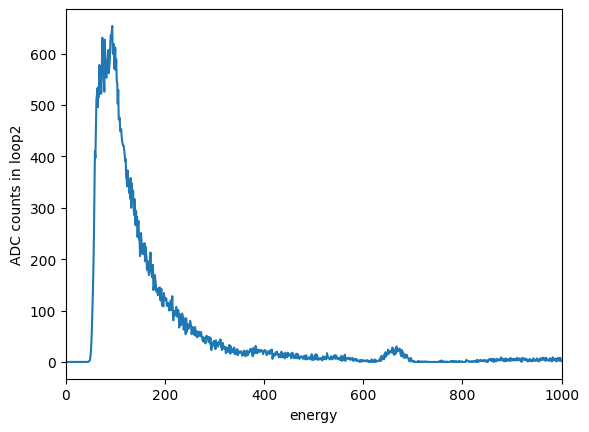

In [8]:
for loop in range(num_of_loops):
    file_path = os.path.join(data_path +str(loop)+ '.txt')
    print(file_path)
    with open(file_path) as f:
        lines = f.readlines()
        num = len(lines)/1023
        print(num)
        
        test = np.array([int(line) for line in lines[:1023]])
        test.mean()
        plt.figure()
        plt.plot(test - test[0:500].mean())
        
        subtracted = test - test[0:500].mean()
        subtracted[510:525].sum()
        plt.xlim([500, 570])
        
        N_points = 1023
        data = np.array([int(line) for line in lines])
        length = len(data)//N_points
        data_res = data[:length * N_points].reshape(-1, N_points)
        array = [-intg(d) for d in data_res]
        hist, edges = histdata(loop, array, 1000)
        total_hist += hist

        del lines
        del test
        del subtracted
        del data
        del data_res
        del array
        
        plt.figure()
        plt.plot(edges[:-1], hist)
        plt.xlim([0, 1000])
        plt.xlabel('energy')
        plt.ylabel('ADC counts in loop' + str(loop))

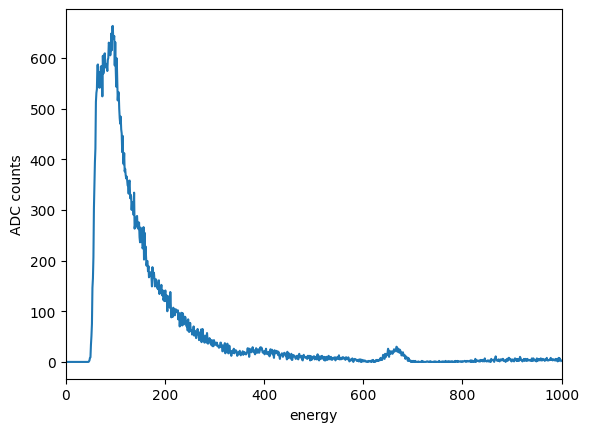

In [17]:
plt.figure()
plt.plot(edges[:-1], total_hist)
plt.xlim([0, 1000])
plt.xlabel('energy')
plt.ylabel('ADC counts')
plt.show()

In [19]:
total_path = data_path + 'with' + str(num_of_loops) + 'loops.npy'
print(total_path)
np.save(total_path, total_hist)

C:\Users\kyoto\WaveDump\down01241002\01241002downwith1loops.npy


In [9]:
edges_path = path + '/edges.npy'
print(edges_path)
np.save(edges_path, edges)

C:\Users\kyoto\WaveDump/edges.npy


In [11]:
t = np.load(total_path)
e = np.load(edges_path)

NameError: name 'total_path' is not defined

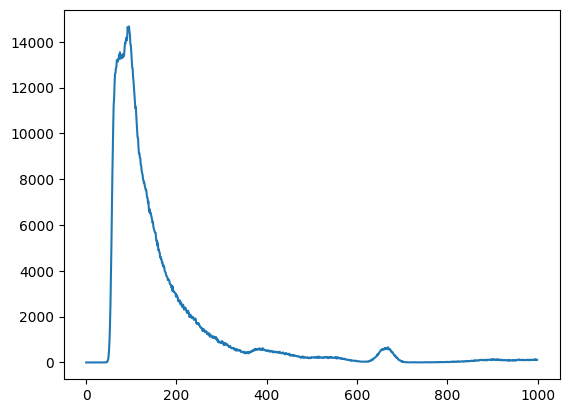

In [128]:
#print(t)
plt.plot(e[:-1], t)
#plt.yscale('log')